In [30]:
import numpy as mp 
import pandas as dp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
%matplotlib inline

In [4]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

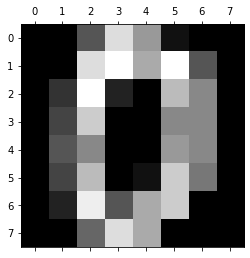

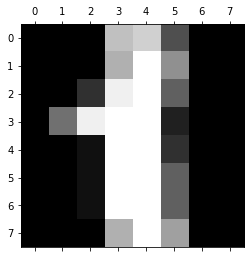

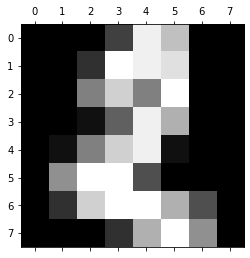

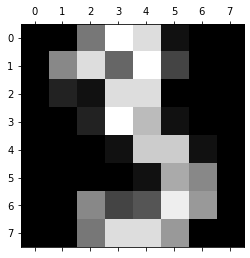

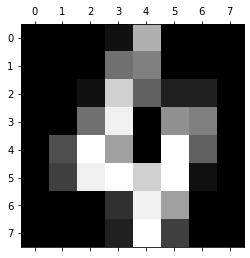

In [6]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])

In [7]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [8]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [10]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [16]:
len(X_train)

1257

In [17]:
len(X_test)

540

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()

In [21]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
model.score(X_test,y_test)

0.9611111111111111

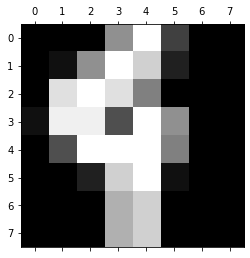

In [24]:
plt.matshow(digits.images[87])

In [26]:
model.predict([digits.data[87]])

array([4])

In [27]:
model.predict(digits.data[0:5])


array([0, 1, 2, 3, 4])

In [28]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [29]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  1, 60,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 59,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 41,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  1,  0, 47,  2,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 65,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 54,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  2, 52]])

Text(69.0, 0.5, 'Actual')

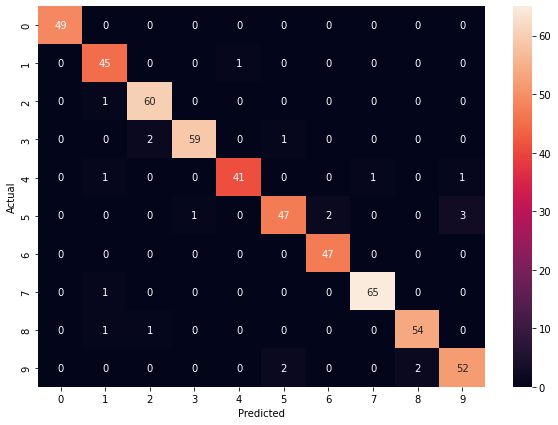

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [33]:
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [34]:
joblib.dump(model,'multiclass')

['multiclass']